## _ctdcal_ calibration

### First, set up the environment

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
import numpy as np

try:
    from IPython import get_ipython

    get_ipython().run_line_magic("matplotlib", "inline")
except AttributeError:
    print("Magic function can only be used in IPython environment")
    matplotlib.use("Agg")

plt.style.use("dark_background")

### Next, load in some example data from CCHDO's website

In [42]:
from ctdcal import io

btl_url = "https://cchdo.ucsd.edu/data/19436/325020210316_hy1.csv"
btl = io.load_exchange_btl(btl_url).replace(-999, np.nan)

ctd_url = "https://cchdo.ucsd.edu/data/19434/325020210316_ct1.zip"
headers, ctd = io.load_exchange_ctd(ctd_url)
ssscc_list = [f"{int(h['STNNBR']):03d}" + f"{int(h['CASTNO']):02d}" for h in headers]

# can we avoid doing this?
# for cast, ssscc in zip(ctd, ssscc_list):
#     cast["SSSCC"] = ssscc

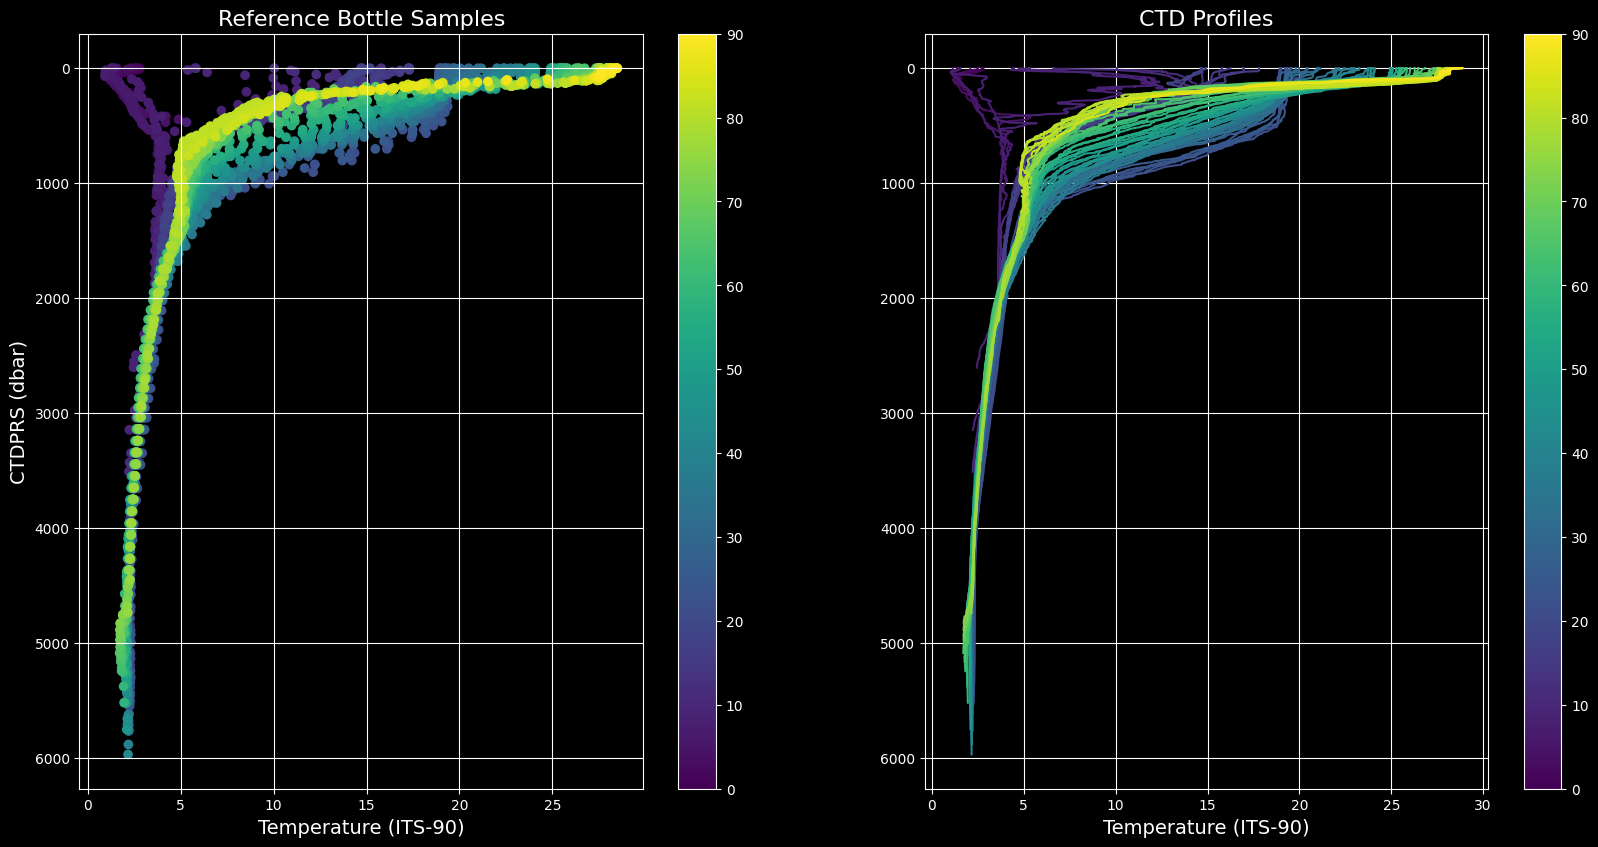

In [45]:
# set up figure and colorbar
plt.figure(figsize=(20,10), dpi=100)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0, vmax=90))

# bottle
plt.subplot(121)
plt.scatter(btl["REFTMP"], btl["CTDPRS"], c=btl["STNNBR"])
plt.colorbar(sm)
plt.ylim(plt.ylim()[::-1])
plt.grid()
plt.xlabel("Temperature (ITS-90)", fontsize=14)
plt.ylabel("CTDPRS (dbar)", fontsize=14)
plt.title("Reference Bottle Samples", fontsize=16)

# CTD
plt.subplot(122)
for cast, color in zip(ctd, get_cmap("viridis")(np.linspace(0, 1, len(ctd)))):
    plt.plot(cast["CTDTMP"], cast["CTDPRS"], c=color)

plt.colorbar(sm)
plt.ylim(plt.ylim()[::-1])
plt.grid()
plt.xlabel("Temperature (ITS-90)", fontsize=14)
plt.title("CTD Profiles", fontsize=16);

Text(0.5, 1.0, 'Bottle Residual (REFTMP - CTDTMP)')

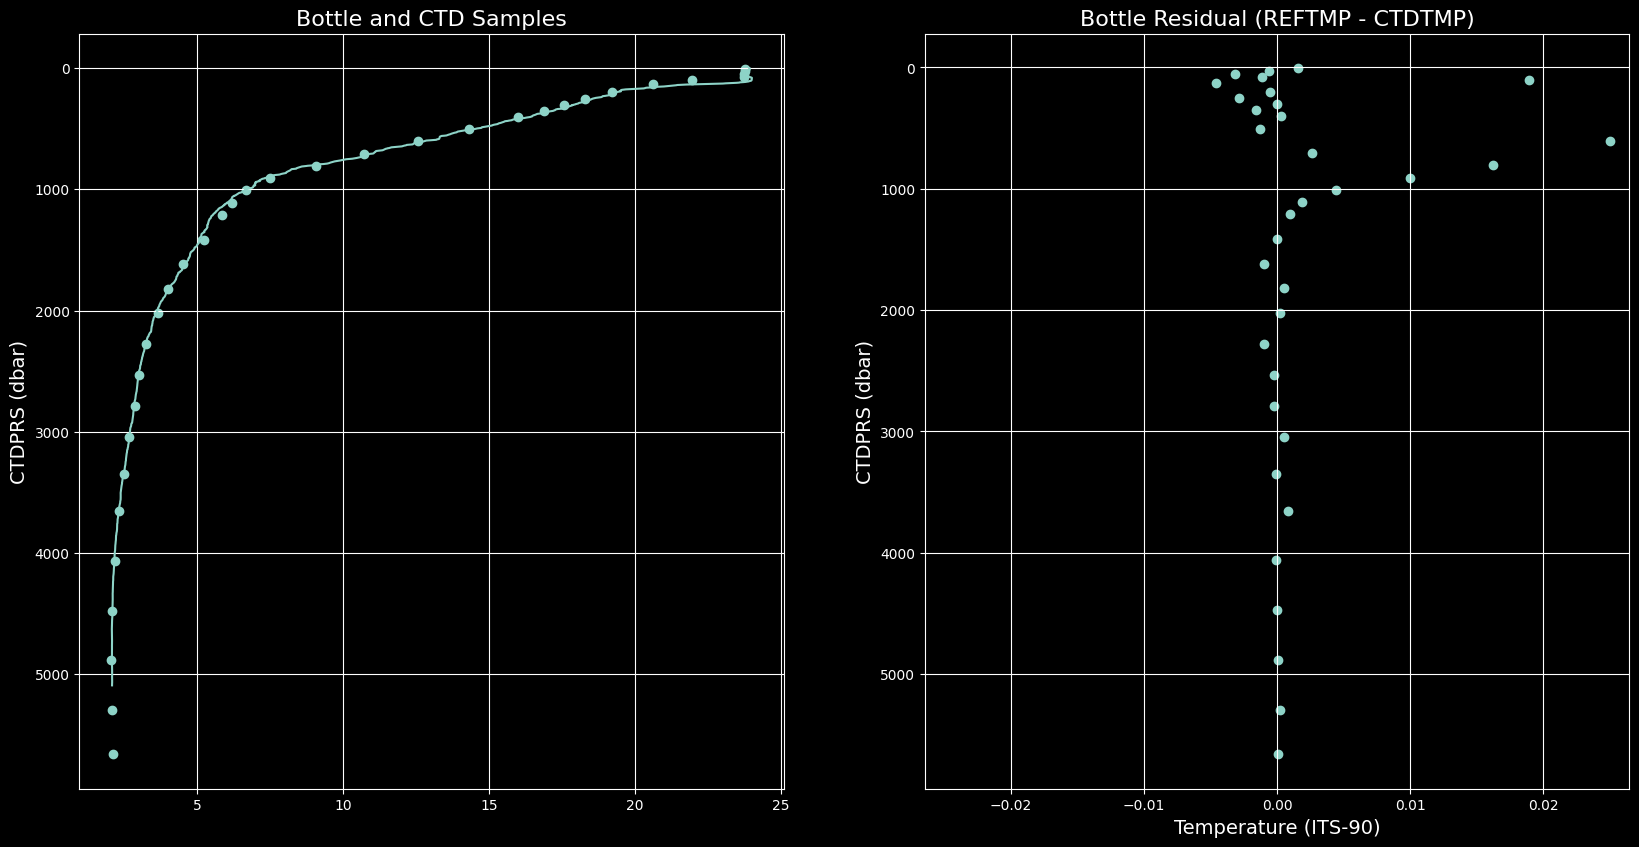

In [75]:
stn = 45
btl_rows = btl["STNNBR"] == 45

plt.figure(figsize=(20, 10), dpi=100)

# overlay plot
plt.subplot(121)
plt.plot(ctd[stn]["CTDTMP"], ctd[stn]["CTDPRS"])
plt.scatter(btl.loc[btl_rows, "REFTMP"], btl.loc[btl_rows, "CTDPRS"])
plt.ylim(plt.ylim()[::-1])
plt.grid()
plt.ylabel("CTDPRS (dbar)", fontsize=14)
plt.title("Bottle and CTD Samples", fontsize=16)

# residual plot
plt.subplot(122)
plt.scatter(
    btl.loc[btl_rows, "REFTMP"] - btl.loc[btl_rows, "CTDTMP"],
    btl.loc[btl_rows, "CTDPRS"],
)
plt.xlim(max(np.abs(plt.xlim())) * np.array((-1,1)))
plt.ylim(plt.ylim()[::-1])
plt.grid()
plt.xlabel("Temperature (ITS-90)", fontsize=14)
plt.ylabel("CTDPRS (dbar)", fontsize=14)
plt.title("Bottle Residual (REFTMP - CTDTMP)", fontsize=16);
